# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [71]:
print("Для того, чтоб можно было воспроизвести результаты, проверить работу программы или сравнить результаты разных реализаций. Ведь иначе берется случайное число, которое и используется в рандоме.")

Для того, чтоб можно было воспроизвести результаты, проверить работу программы или сравнить результаты разных реализаций. Ведь иначе берется случайное число, которое и используется в рандоме.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [72]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [73]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [74]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [75]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [76]:
df_train.describe(include='all') # без параметра будет только для числовых, а с параметром object для object

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [77]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [78]:
df_train.isna().sum() # и число пропусков и в каких колонках

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [79]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [80]:
print("В колонках: mileage, engine, max_power, torque, seats. (и в тренировочных и в тестовых)")

В колонках: mileage, engine, max_power, torque, seats. (и в тренировочных и в тестовых)


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [81]:
features = df_train.drop('selling_price', axis=1)

features.duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [82]:
features[features.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [83]:
target = df_train['selling_price']
df_train = df_train[df_train.drop('selling_price', axis=1).isin(features.drop_duplicates(keep='first'))].dropna(how='all')
df_train['selling_price'] = target
df_train[df_train.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


In [84]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [85]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5835,Hyundai Santro Xing GLS,2008.0,120000,191000.0,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013.0,260000,50000.0,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013.0,320000,110000.0,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007.0,135000,119000.0,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
5839,Maruti Swift Dzire ZDi,2009.0,382000,120000.0,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [86]:
def mileage(df):
  mileage = []
  for i in df['mileage']:
    if str(i).endswith('km/kg'):
      i = i[:-6]
      i = float(i)*1.40
      mileage.append(float(i))
    elif str(i).endswith('kmpl'):
      i = i[:-6]
      mileage.append(float(i))
    else:
      mileage.append(i)
  return mileage

In [87]:
df_train['mileage'] = mileage(df_train)
df_train['engine'] = df_train['engine'].str.replace(' CC', '').astype(float)
df_train.loc[df_train['max_power'] == ' bhp', 'max_power'] = np.NaN
df_train['max_power'] = df_train['max_power'].str.replace(' bhp', '').astype(float)

df_test['mileage'] = mileage(df_test)
df_test['engine'] = df_test['engine'].str.replace(' CC', '').astype(float)
df_test['max_power'] = df_test['max_power'].str.replace(' bhp', '').astype(float)

torque_train = df_train['torque']
df_train.drop('torque', axis=1, inplace=True)

torque_test = df_test['torque']
df_test.drop('torque', axis=1, inplace=True)

df_train.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
5835,Hyundai Santro Xing GLS,2008.0,120000,191000.0,Petrol,Individual,Manual,First Owner,17.9,1086.0,62.10,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013.0,260000,50000.0,Petrol,Individual,Manual,Second Owner,18.0,998.0,67.10,5.0
5837,Hyundai i20 Magna,2013.0,320000,110000.0,Petrol,Individual,Manual,First Owner,18.0,1197.0,82.85,5.0
5838,Hyundai Verna CRDi SX,2007.0,135000,119000.0,Diesel,Individual,Manual,Fourth & Above Owner,16.0,1493.0,110.00,5.0
5839,Maruti Swift Dzire ZDi,2009.0,382000,120000.0,Diesel,Individual,Manual,First Owner,19.0,1248.0,73.90,5.0


In [88]:
torque_train.head(10) # Как можно видеть, виды записей здесь очень различного формата, это можно сделать через регулярные, но крайне муторно, поэтому сделал более простую, но менее точную замену, возможно лучше вообще без неё в таком случае

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2    22.4 kgm at 1750-2750rpm
3       11.5@ 4,500(kgm@ rpm)
4           113.75nm@ 4000rpm
5        7.8@ 4,500(kgm@ rpm)
6               59Nm@ 2500rpm
7         170Nm@ 1800-2400rpm
8              160Nm@ 2000rpm
9              248Nm@ 2250rpm
Name: torque, dtype: object

In [89]:
torque_train = torque_train.str.replace(',', '')
df_train['torque'] = torque_train.str.extract(r'(\d+\.?\d*)').astype(float)
df_train['max_torque_rpm'] = torque_train.str.extract(r'@ (\d*)').astype(float)

torque_test = torque_test.str.replace(',', '')
df_test['torque'] = torque_test.str.extract(r'(\d+\.?\d*)').astype(float)
df_test['max_torque_rpm'] = torque_test.str.extract(r'@ (\d*)').astype(float)

df_train.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm
5835,Hyundai Santro Xing GLS,2008.0,120000,191000.0,Petrol,Individual,Manual,First Owner,17.9,1086.0,62.10,5.0,96.1,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013.0,260000,50000.0,Petrol,Individual,Manual,Second Owner,18.0,998.0,67.10,5.0,90.0,3500.0
5837,Hyundai i20 Magna,2013.0,320000,110000.0,Petrol,Individual,Manual,First Owner,18.0,1197.0,82.85,5.0,113.7,4000.0
5838,Hyundai Verna CRDi SX,2007.0,135000,119000.0,Diesel,Individual,Manual,Fourth & Above Owner,16.0,1493.0,110.00,5.0,24.0,1900.0
5839,Maruti Swift Dzire ZDi,2009.0,382000,120000.0,Diesel,Individual,Manual,First Owner,19.0,1248.0,73.90,5.0,190.0,2000.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [90]:
missing_columns = df_train.columns[df_train.isnull().any()]
missing_columns

Index(['mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm'], dtype='object')

In [91]:
df_train.isna().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           186
engine            186
max_power         184
seats             186
torque            187
max_torque_rpm    373
dtype: int64

In [92]:
df_test.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage           19
engine            19
max_power         19
seats             19
torque            19
max_torque_rpm    56
dtype: int64

In [93]:
df_train[missing_columns] = df_train[missing_columns].fillna(df_train[missing_columns].median())
df_test[missing_columns] = df_test[missing_columns].fillna(df_train[missing_columns].median()) # заменили train'ом

In [94]:
df_train.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque            0
max_torque_rpm    0
dtype: int64

In [95]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque            0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [96]:
print("Потому что то, что не работает как число должно быть категориальным, чтоб не было соблазна работать ка с числом, ну и условная машина с 4 сиденьями не равняется двум с двумя, и не значит, что машина с 10 сидениями больше, чем та, что с двумя в 5 раз и так далее.")

Потому что то, что не работает как число должно быть категориальным, чтоб не было соблазна работать ка с числом, ну и условная машина с 4 сиденьями не равняется двум с двумя, и не значит, что машина с 10 сидениями больше, чем та, что с двумя в 5 раз и так далее.


In [97]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   float64
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   float64
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  seats           5840 non-null   int64  
 12  torque          5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

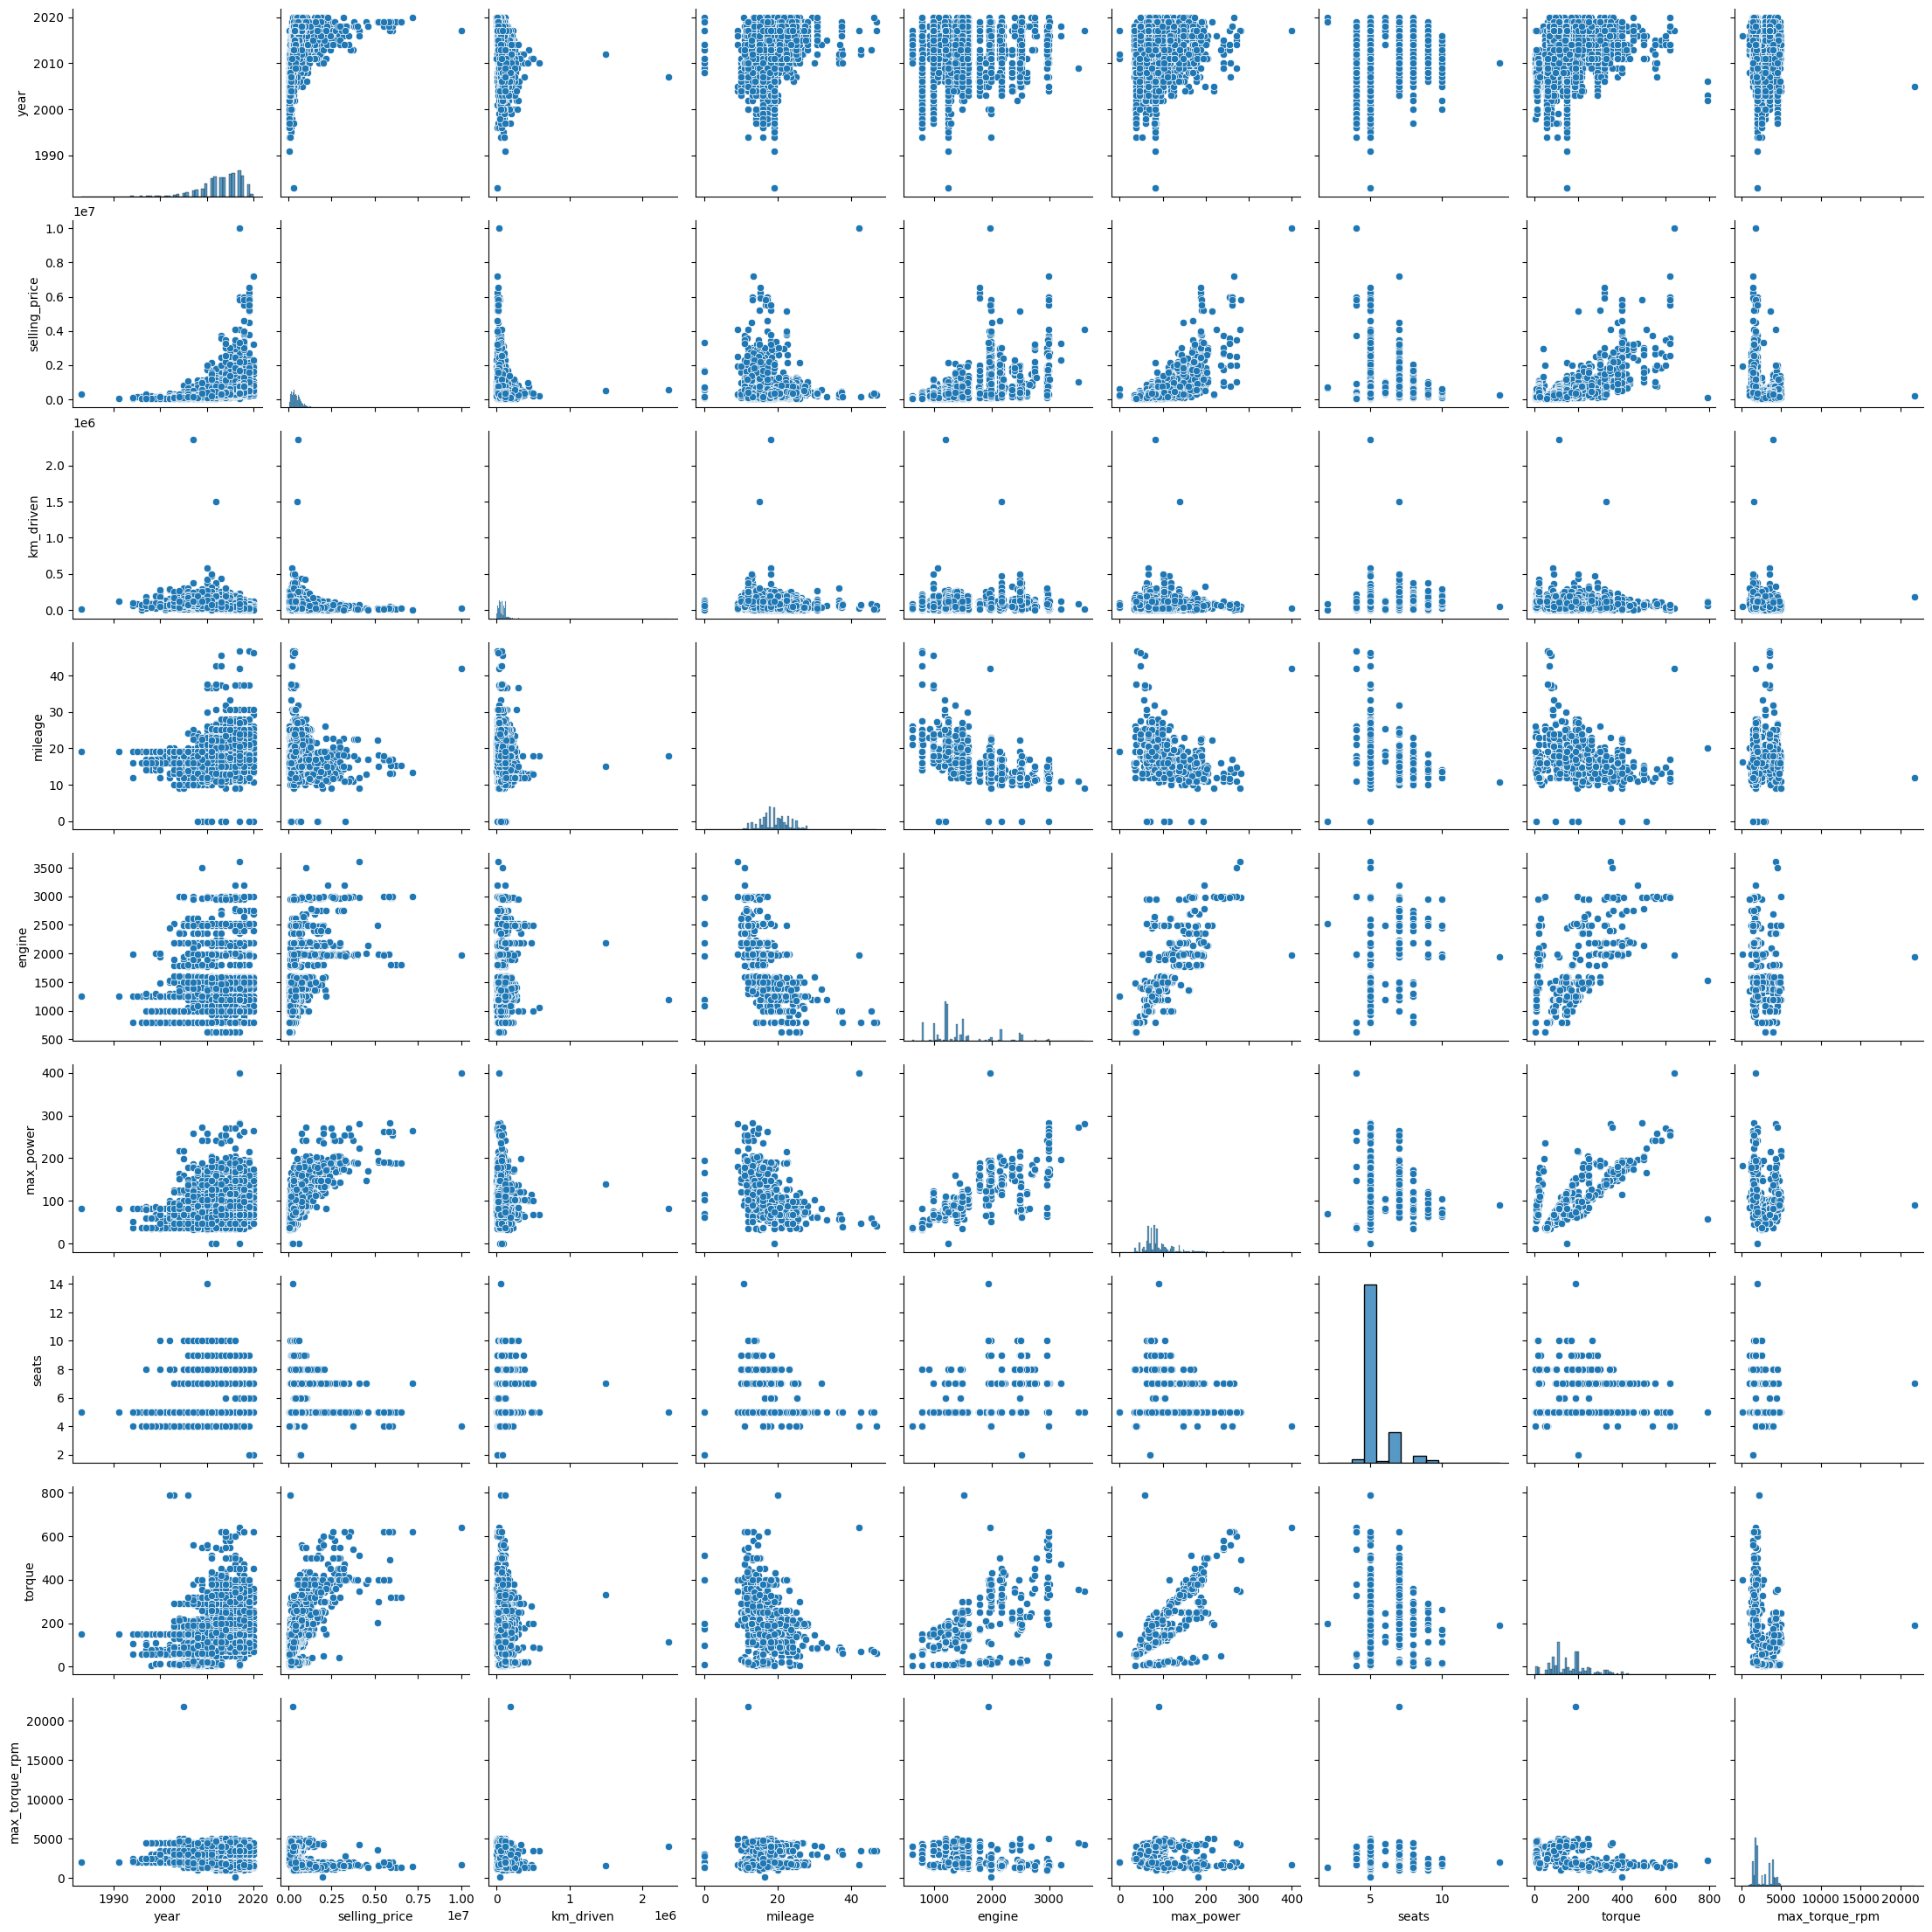

In [99]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [100]:
print('year, engine, max_power, torque являются теми признаками, которые имеют что-то на похожую зависимость цены от этого параметра, остальные параметры если и имеют что-то подобное, то очень спорное.')

year, engine, max_power, torque являются теми признаками, которые имеют что-то на похожую зависимость цены от этого параметра, остальные параметры если и имеют что-то подобное, то очень спорное.


<ipython-input-101-0a7f586c936f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm') # такой график лучше даёт понимать корреляцию признаков


<Axes: >

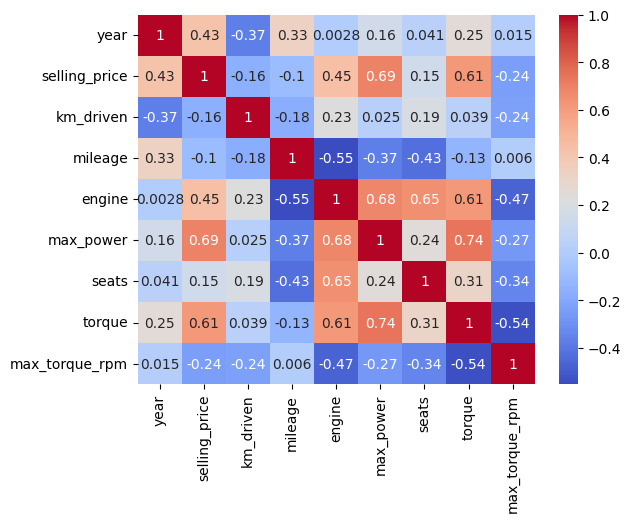

In [101]:
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm') # такой график лучше даёт понимать корреляцию признаков

In [102]:
print('Как видим по графику, те признаки, что я указал ранее и правда имеют больше корреляцию с selling_price (целевая переменна)')
print('Не знаю что сказать об остальных корреляциях признаков, просто те, что имеют больше числа по модулю больше коррелируют, например максимальные, что я нашел это корреляция max_power и torque или engine и max_power. А вот минимальная корреляция между engine и year, что вполне логично)')

Как видим по графику, те признаки, что я указал ранее и правда имеют больше корреляцию с selling_price (целевая переменна)
Не знаю что сказать об остальных корреляциях признаков, просто те, что имеют больше числа по модулю больше коррелируют, например максимальные, что я нашел это корреляция max_power и torque или engine и max_power. А вот минимальная корреляция между engine и year, что вполне логично)


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

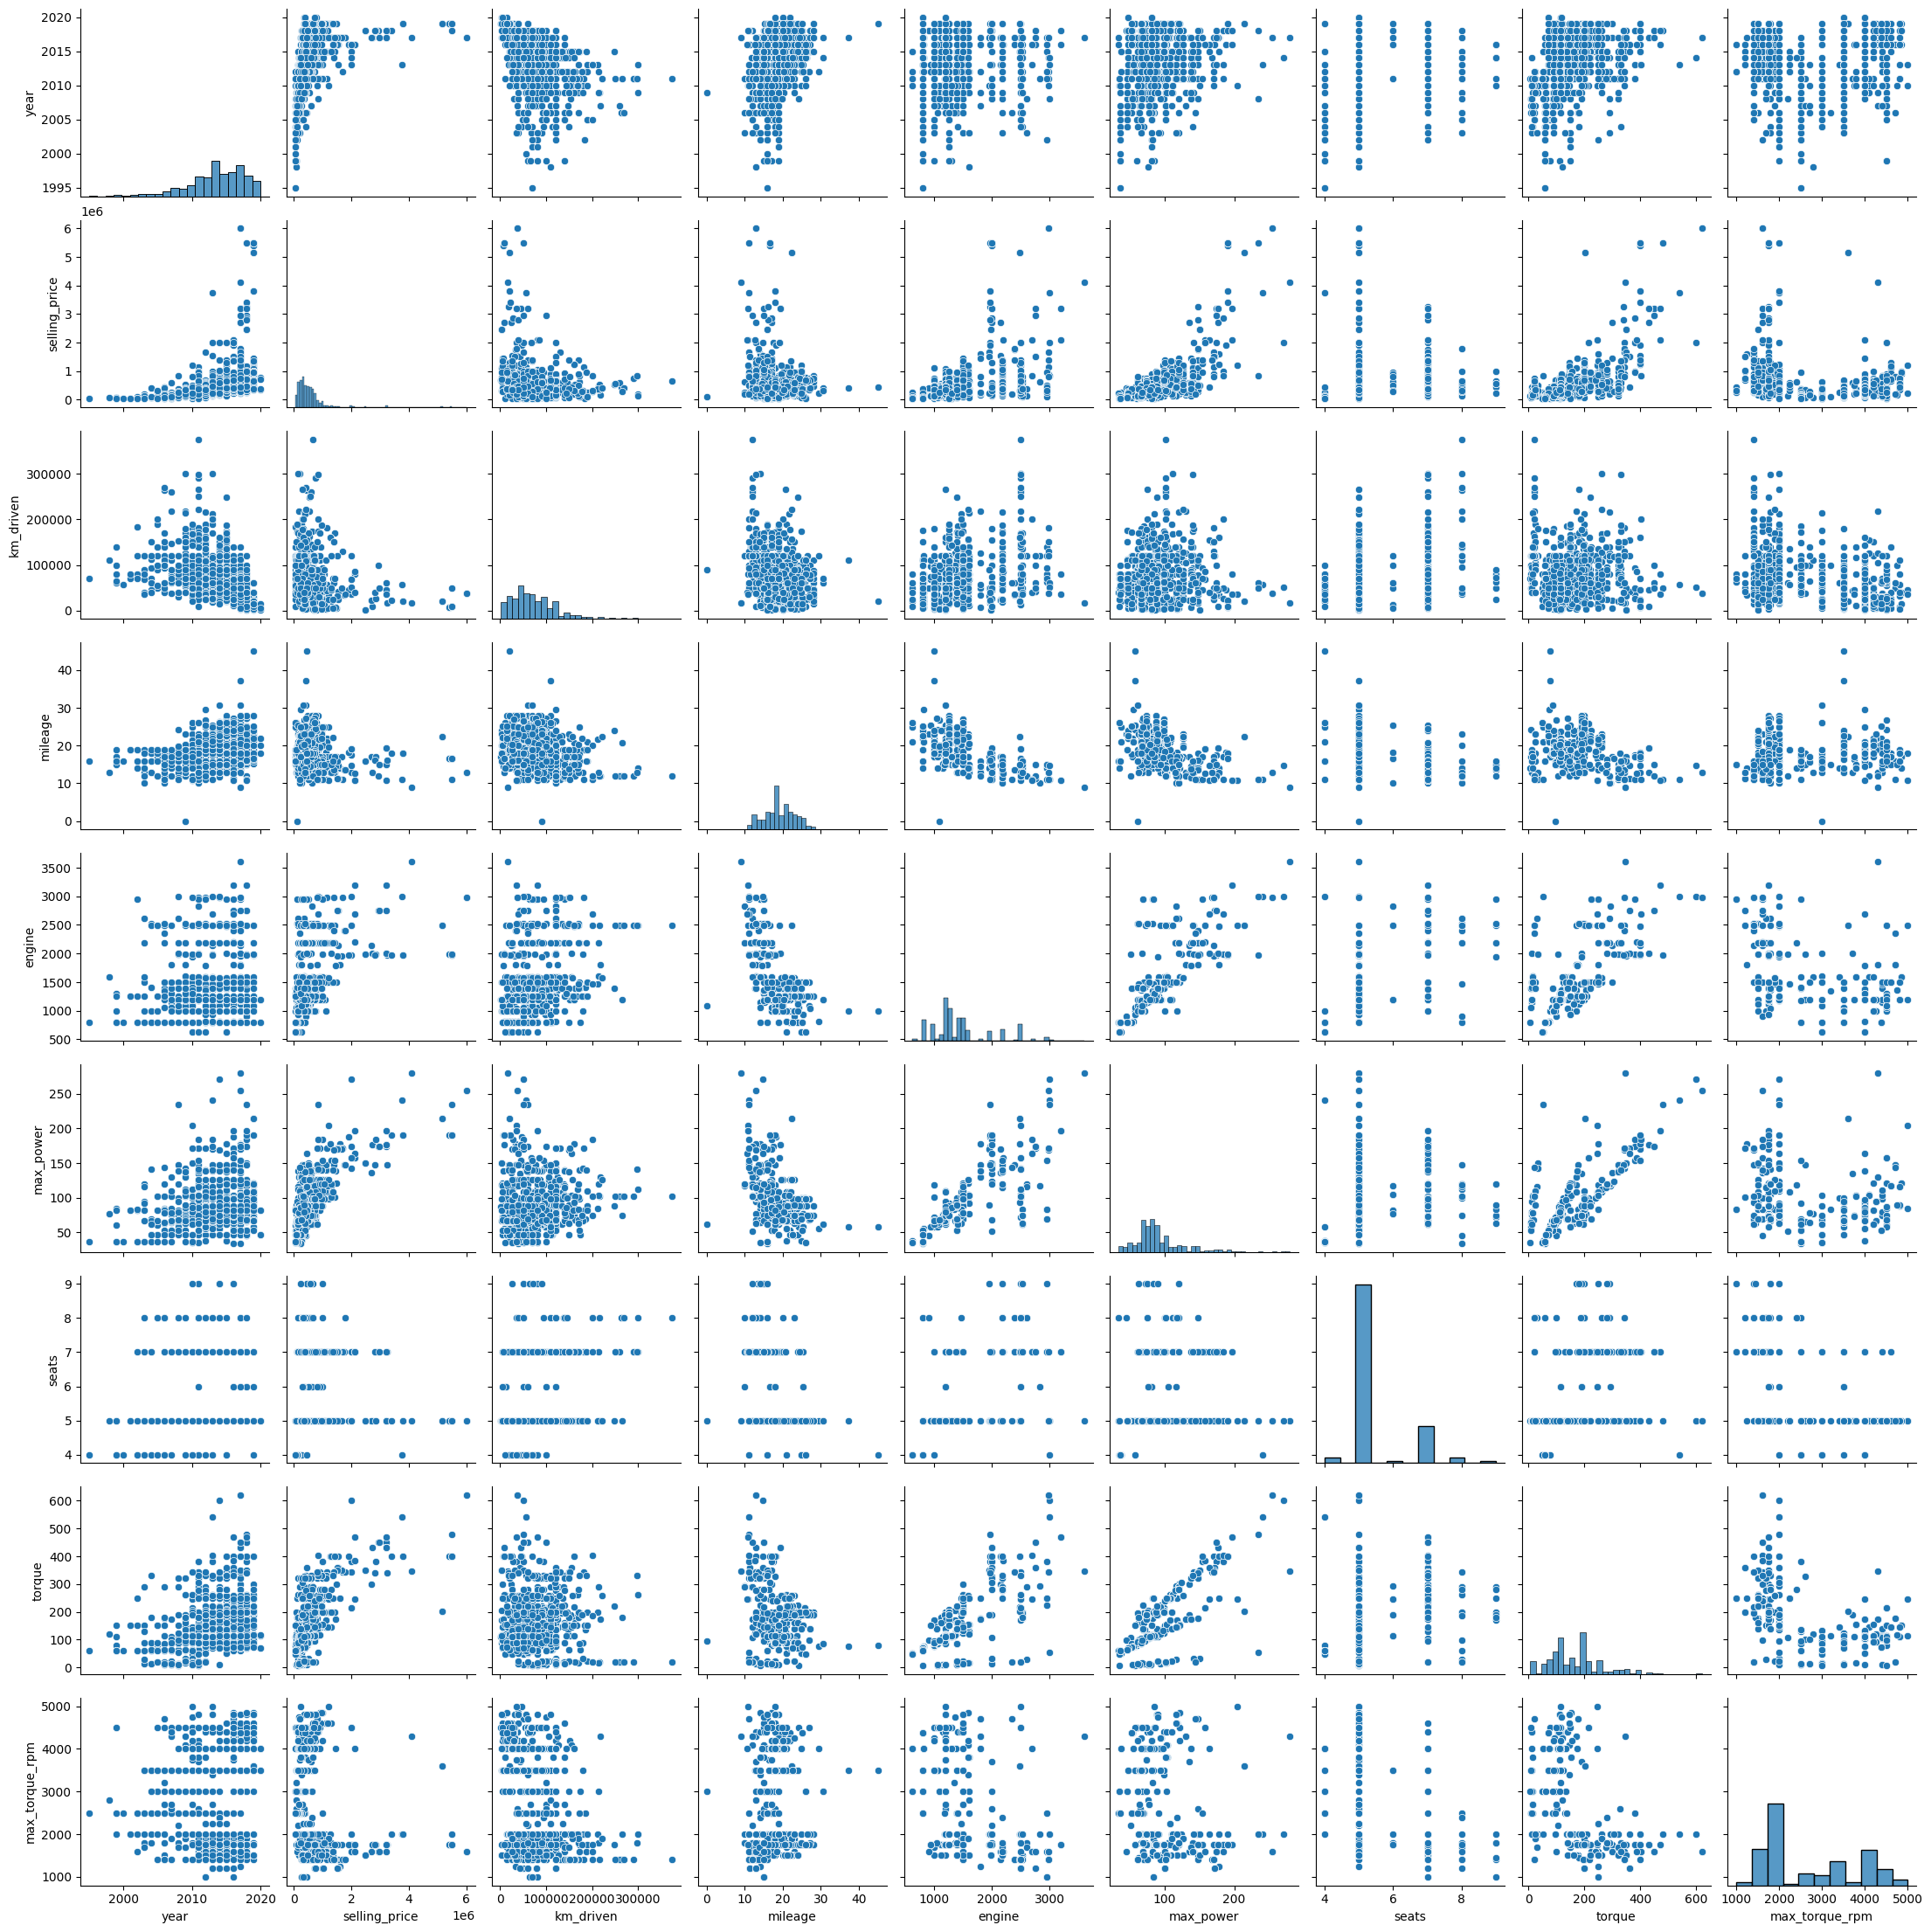

In [103]:
sns.pairplot(df_test)

In [104]:
print('За всеми парами уследить тяжело, но целевая переменная имеет очень схожую корреляцию как в тренировочном, так и в валидационном dataframe.')

За всеми парами уследить тяжело, но целевая переменная имеет очень схожую корреляцию как в тренировочном, так и в валидационном dataframe.


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

Ну построим его снова)


<ipython-input-105-99f3a46466d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')


<Axes: >

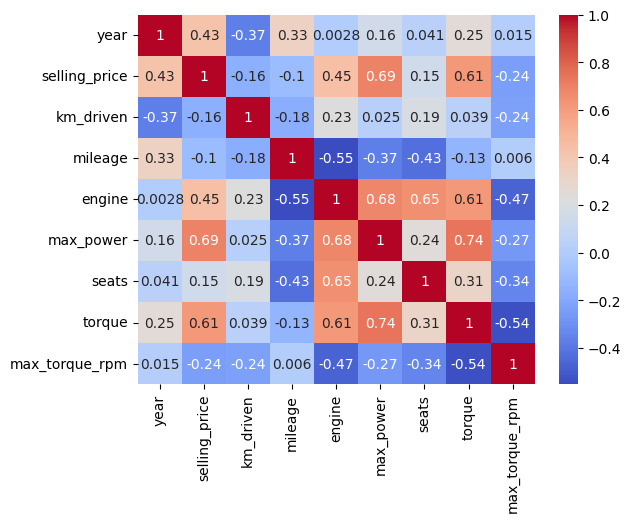

In [105]:
print('Ну построим его снова)')
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [106]:
print('Как писал ранее, наименее скоррелированы между собой engine и year, потому что их коррелиция наиболее близка к 0')
print('Как и писал ранее, наибольшая положительная линейная зависимость встречается между torque и max_power.')
print('Да, Можно видеть, что корреляция -0.37, отрицательное число говорит об обратной зависимости, а число 0.37, говорит, что зависимость не так слаба, то есть можем с какой-то долей уверенности говорить, что это утвержжение верное, да и в графике pairplot можно видеть условный треугольник с вершиной в максимальном годе и минимальном пробеге, что сигнализирует об этом же.')

Как писал ранее, наименее скоррелированы между собой engine и year, потому что их коррелиция наиболее близка к 0
Как и писал ранее, наибольшая положительная линейная зависимость встречается между torque и max_power.
Да, Можно видеть, что корреляция -0.37, отрицательное число говорит об обратной зависимости, а число 0.37, говорит, что зависимость не так слаба, то есть можем с какой-то долей уверенности говорить, что это утвержжение верное, да и в графике pairplot можно видеть условный треугольник с вершиной в максимальном годе и минимальном пробеге, что сигнализирует об этом же.


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

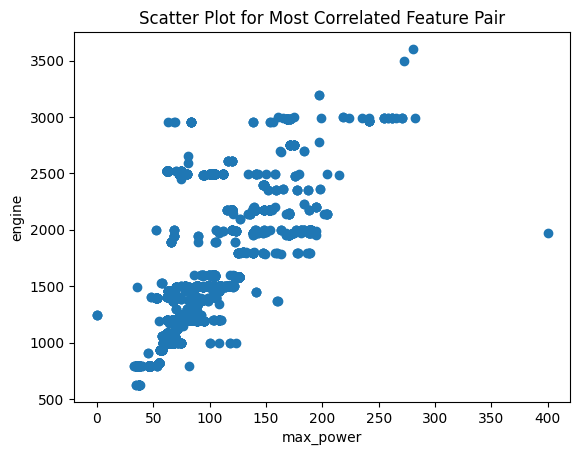

In [107]:
plt.scatter(df_train['max_power'], df_train['engine'])
plt.xlabel('max_power')
plt.ylabel('engine')
plt.title('Scatter Plot for Most Correlated Feature Pair')
plt.show()

Видна достаточно хорошая линейная положительная корреляция

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

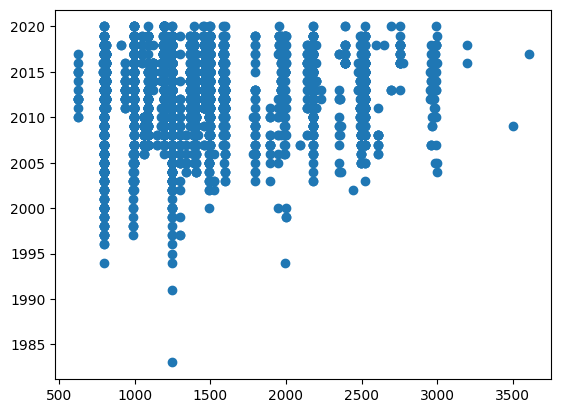

In [108]:
# график с худшей корреляцией
plt.scatter(df_train['engine'], df_train['year'])
plt.show()

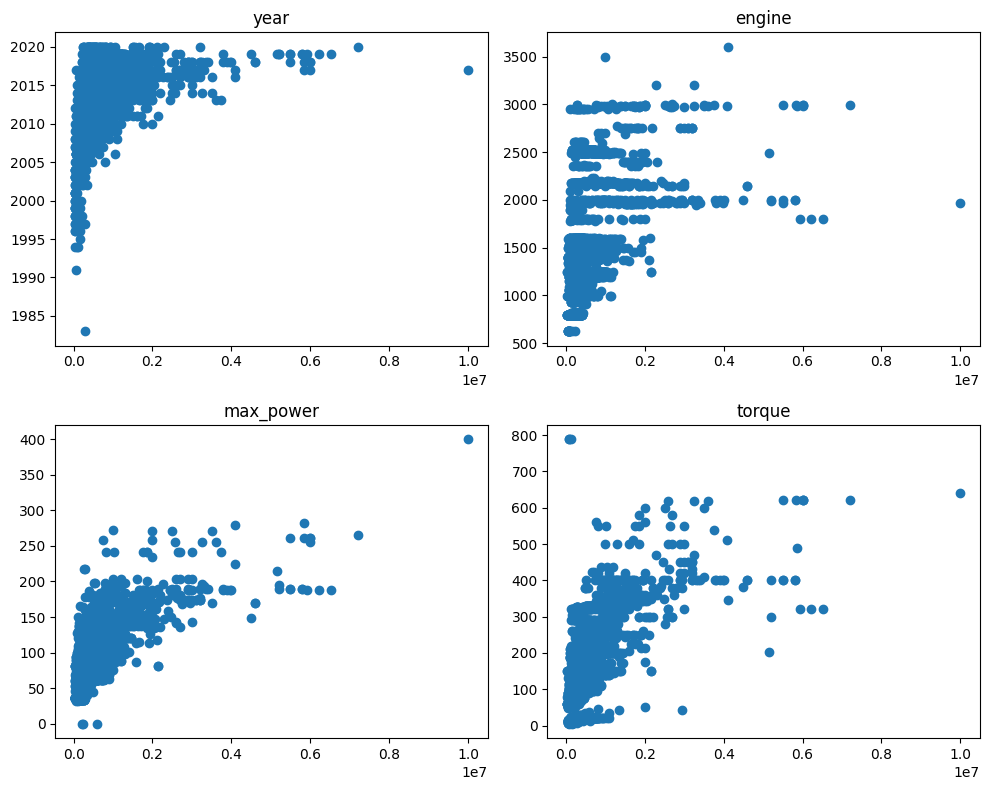

In [109]:
# отображение 4 наиболее коррелирующих признаков с целевой переменной
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axs[0, 0].scatter(df_train['selling_price'], df_train['year'])
axs[0, 0].set_title('year')

axs[0, 1].scatter(df_train['selling_price'], df_train['engine'])
axs[0, 1].set_title('engine')

axs[1, 0].scatter(df_train['selling_price'], df_train['max_power'])
axs[1, 0].set_title('max_power')

axs[1, 1].scatter(df_train['selling_price'], df_train['torque'])
axs[1, 1].set_title('torque')

plt.tight_layout()
plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [110]:
y_train = df_train['selling_price']
X_train = df_train.drop(['name', 'selling_price', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

y_test = df_test['selling_price']
X_test = df_test.drop(['name', 'selling_price', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

In [111]:
print(f'{X_train.shape}  не равно (5840, 6), оно на 2 признака больше, полагаю это потому что я не удалил torque, а разделил на torque и max_torque_rpm, писал, что перевод их очень сложен и лучше избавиться, но как оказалось, torque получился очень скоррелирован с целевой, но для дальнейшего обучения удалим эти стобцы тоже')

(5840, 8)  не равно (5840, 6), оно на 2 признака больше, полагаю это потому что я не удалил torque, а разделил на torque и max_torque_rpm, писал, что перевод их очень сложен и лучше избавиться, но как оказалось, torque получился очень скоррелирован с целевой, но для дальнейшего обучения удалим эти стобцы тоже


In [112]:
X_train.drop(['torque', 'max_torque_rpm'], axis=1, inplace=True)
X_test.drop(['torque', 'max_torque_rpm'], axis=1, inplace=True)
assert X_train.shape == (5840, 6)

In [113]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

def print_metrics(train_true, train_pred, test_true, test_pred):
  print(f'Train: r2 = {r2_score(train_true, train_pred)}, MSE = {MSE(train_true, train_pred)}')
  print(f'Test: r2 = {r2_score(test_true, test_pred)}, MSE = {MSE(test_true, test_pred)}')


model = LinearRegression()
model.fit(X_train, y_train)
print_metrics(y_train, model.predict(X_train), y_test, model.predict(X_test))

Train: r2 = 0.5920977436462009, MSE = 116920424973.68562
Test: r2 = 0.5942003821273043, MSE = 233265208220.39432


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [115]:
from sklearn.preprocessing import StandardScaler

preproc = StandardScaler()
X_train = pd.DataFrame(preproc.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(preproc.transform(X_test), columns=X_train.columns)

model = LinearRegression()
model.fit(X_train, y_train)
print_metrics(y_train, model.predict(X_train), y_test, model.predict(X_test))

Train: r2 = 0.5920977436462007, MSE = 116920424973.68568
Test: r2 = 0.5942003821273181, MSE = 233265208220.38644


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [116]:
print(f'Максимальный коэффициент у {X_train.columns[np.argmax(np.abs(model.coef_))]}, хотя это было очевидно по таблице корреляции и его графику, который наиболее был похож на линейную зависимость с целевой')
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients)

Максимальный коэффициент у max_power, хотя это было очевидно по таблице корреляции и его графику, который наиболее был похож на линейную зависимость с целевой
     Feature    Coefficient
0       year  153923.360153
1  km_driven  -43877.034005
2    mileage   26502.765276
3     engine   59887.941351
4  max_power  322641.962760
5      seats  -24045.356891


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [117]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
print_metrics(y_train, model.predict(X_train), y_test, model.predict(X_test))

Train: r2 = 0.5920977436116907, MSE = 116920424983.5776
Test: r2 = 0.5941992065345489, MSE = 233265883984.67993


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [118]:
model.coef_
# Скорее всего потому что значения по умолчанию не справляются с этим, а модель получилась такая, что при l1 регуляризации мы не попадаем на угл, а касаемся ребра.

array([153923.08653521, -43875.93588024,  26501.0286094 ,  59883.2165283 ,
       322642.8466406 , -24042.43749509])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [119]:
X_train.head()

,year,km_driven,mileage,engine,max_power,seats
0,0.139570,1.191152,0.868957,-0.373643,-0.439550,-0.434419
1,0.139570,0.766619,0.423185,0.141162,0.493513,-0.434419
2,-0.837167,0.883158,0.868957,-0.068879,0.066175,-0.434419
3,-1.569719,0.766619,-0.773361,-0.270682,0.009281,-0.434419
4,0.872122,-0.482007,0.188568,-0.478663,-0.191113,-0.434419


In [120]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': range(1000, 30000, 1000), 'max_iter': range(100, 1000, 50)}

lasso = Lasso()

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10)

grid_search.fit(X_train, y_train)

print("Наилучшие параметры:", grid_search.best_params_)
print("Значение метрики качества:", grid_search.best_score_)

Наилучшие параметры: {'alpha': 27000, 'max_iter': 100}
Значение метрики качества: 0.5750256718175464


In [121]:
print(f'Обучать пришлось {len(range(1000, 30000, 1000)) * len(range(100, 1000, 50)) * 10} моделей')

Обучать пришлось 5220 моделей


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [122]:
model = Lasso(alpha=27000, max_iter=100)
model.fit(X_train, y_train)
print_metrics(y_train, model.predict(X_train), y_test, model.predict(X_test))
model.coef_

Train: r2 = 0.5824130978940609, MSE = 119696415739.66383
Test: r2 = 0.5640821681374868, MSE = 250578017666.57074


array([145645.33539026, -15412.69482061,      0.        ,      0.        ,
       321456.29169549,     -0.        ])

Занулились, правда метрики показывают ухудшение предсказаний

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [54]:
from sklearn.linear_model import ElasticNet

param_grid = {'alpha': range(1000, 30000, 1000), 'max_iter': range(500, 1000, 50), 'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

elastic_net = ElasticNet()

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=10)

grid_search.fit(X_train, y_train)

print("Наилучшие параметры:", grid_search.best_params_)
print("Значение метрики качества:", grid_search.best_score_)

Наилучшие параметры: {'alpha': 27000, 'l1_ratio': 1.0, 'max_iter': 500}
Значение метрики качества: 0.5750256718175464


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [55]:
model = ElasticNet(alpha=27000, max_iter=500, l1_ratio=1)
model.fit(X_train, y_train)
print_metrics(y_train, model.predict(X_train), y_test, model.predict(X_test))
model.coef_

Train: r2 = 0.5824130978940609, MSE = 119696415739.66383
Test: r2 = 0.5640821681374868, MSE = 250578017666.57074


array([145645.33539026, -15412.69482061,      0.        ,      0.        ,
       321456.29169549,     -0.        ])

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [56]:
X_train_cat = df_train.drop(['selling_price', 'name', 'torque', 'max_torque_rpm'], axis=1)

In [57]:
assert X_train_cat.shape == (5840, 10)

In [58]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [59]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(X_train_cat[features]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(features))
X_train_cat = pd.concat([X_train_cat.drop(features, axis=1), encoded_df], axis=1)
X_train_cat.head()

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014.0,145500.0,23.0,1248,74.00,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014.0,120000.0,21.1,1498,103.52,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010.0,127000.0,23.0,1396,90.00,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007.0,120000.0,16.0,1298,88.20,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017.0,45000.0,20.1,1197,81.86,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# Такие же преобразования для теста на пред обученном OneHotEncoder
X_test_cat = df_test.drop(['selling_price', 'name', 'torque', 'max_torque_rpm'], axis=1)
encoded_features = encoder.transform(X_test_cat[features]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(features))
X_test_cat = pd.concat([X_test_cat.drop(features, axis=1), encoded_df], axis=1)
X_test_cat.head()

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2010,168000,14.0,2498,112.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2017,25000,21.0,1497,108.5,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007,218463,12.0,1799,130.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,173000,25.0,1498,98.6,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,70000,16.0,1172,65.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 7.0, 10.0]}

ridge = Ridge()

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=10)

grid_search.fit(X_train_cat, y_train)

print("Наилучшие параметры:", grid_search.best_params_)
print("Значение метрики качества:", grid_search.best_score_)

Наилучшие параметры: {'alpha': 7.0}
Значение метрики качества: 0.6217917588121402


In [62]:
model = Ridge(alpha=7)
model.fit(X_train_cat, y_train)
print_metrics(y_train, model.predict(X_train_cat), y_test, model.predict(X_test_cat))
model.coef_

Train: r2 = 0.6560971408367566, MSE = 98575744107.07834
Test: r2 = 0.6443450432008344, MSE = 204440625122.5177


array([ 3.67574416e+04, -5.06109548e-01,  6.11186650e+03,  6.87168147e+01,
        9.08524944e+03,  6.71979985e+04,  1.21383395e+05,  3.45902695e+03,
       -1.11152405e+05, -1.06264815e+05, -2.89464462e+05, -3.78002909e+04,
       -5.36744545e+04,  1.19101580e+06, -3.67203217e+04,  4.61232960e+05,
       -8.80487883e+04, -1.55095805e+05, -8.64692667e+04, -4.69903034e+04,
       -4.82420658e+04, -1.94931057e+04, -3.29761709e+04])

Видно, что результат предсказания стал немного лучше.

# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [63]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [64]:
def business_metrics(y_true, y_pred):
  diff = abs((y_true - y_pred) / y_true) * 100
  count = diff[diff <= 10].count()
  return count / len(y_true)

pred = model.predict(X_test_cat)
print_metrics(y_train, model.predict(X_train_cat), y_test, model.predict(X_test_cat))

business_metrics(y_test, pred)

Train: r2 = 0.6560971408367566, MSE = 98575744107.07834
Test: r2 = 0.6443450432008344, MSE = 204440625122.5177


0.244

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

# Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [65]:
import pickle
with open('model_weights.pickle', 'wb') as file:
    pickle.dump(model.intercept_, file)
    pickle.dump(model.coef_, file)

with open('encoder.pickle', 'wb') as file:
    pickle.dump(encoder, file)

In [68]:
df_test.to_csv('df_test.csv', index=False)  # Сохранили тесты в файл, чтобы поработать с ним в fastapi

In [69]:
import pickle
import pandas as pd

from pydantic import BaseModel
from typing import List
from sklearn.linear_model import Ridge
from fastapi import FastAPI, UploadFile
from starlette.responses import FileResponse

app = FastAPI(title='Cars')


model = Ridge(alpha=7)  # Создание лучшей модели
with open('model_weights.pickle', 'rb') as file:  # Восстановление весов модели из калаба
    model.intercept_ = pickle.load(file)
    model.coef_ = pickle.load(file)

with open('encoder.pickle', 'rb') as file:
    encoder = pickle.load(file)  # Восстановление one hot кодировки


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


def preproc_data_frame(df):
    features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']  # Колонки которые надо изменить one hot кодировкой

    df = df.drop(['selling_price', 'name', 'torque'], axis=1)  # Поля, которые не должны быть в модели
    if 'max_torque_rpm' in df.columns:  # Проверка наличия колонки, которая есть в тестовом файле датафрейма (в файле есть такое, в Item нету)
        df = df.drop(['max_torque_rpm'], axis=1)  # Удаляем столбец, если он был
    encoded_features = encoder.transform(df[features]).toarray()  # изменяем датафрейм на пред обученном one hot encoder'е
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(features))  # Переделываем one hot кодирование в датафрейм с новыми колонками
    return pd.concat([df.drop(features, axis=1), encoded_df], axis=1)  # Склеиваем новый датафрейм из старого без изменяемых столбцов с датафреймом из новых столбцов


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    df = preproc_data_frame(pd.DataFrame(dict(item), index=[0]))  # Преобразуем в словарь и в датафрейм, после чего передаем в функцию препроцесса
    return model.predict(df)  # Возвращаем предсказание


@app.post("/predict_items")
def predict_items(file: UploadFile) -> FileResponse:  # Изменил получаемый и возвращаемый тип, потому что в задании было разное описание, но более интересным показалось получать файл и возвращать новый файл, через сваггер (по пути /docs) делается просто
    df = pd.read_csv(file.filename)  # Получаем файл из файла в датафрейм
    file_name = 'df_test_with_predict.csv'  # Новое имя для файла с предсказанием

    preproced_df = preproc_data_frame(df)  # Подготовить данные под обученную модель
    predictions = model.predict(preproced_df)  # Сделать предсказание подготовленного датафрейма
    df['predictions'] = predictions  # Записать предсказания в начальный датафрейм

    df.to_csv(file_name, index=False)  # Записать датафрейм с предсказанием в новый файл
    return FileResponse(f'./{file_name}', media_type='application/octet-stream', filename=file_name)  # Отдать файл на скачивание


ModuleNotFoundError: ignored

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

Вручную загрузил файл с предсказаниями для проверки работы интерфейса как модели обученной здесь.

In [123]:
df_fastapi = pd.read_csv('df_test_with_predict.csv')

In [129]:
(df_fastapi['predictions'] - pred < 0.00001).sum() == pred.shape[0]

True

Как видим с точностью до 5 знака после запятой ответы совпадают, что может значить, что модель которая предсказывала результаты в fastapi является идентичной той, что мы обучили здесь.

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link